<a href="https://colab.research.google.com/github/JSJeong-me/Generate_AI_for_Image/blob/main/SD3_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SD3 and SD3-Turbo

Welcome. This notebook can be used to try out the SD3 service from Stability.


---



New to colab? Just hit the play button on each of the cells and follow instructions.

You will need an account on https://platform.stability.ai/ to use the features.

Have fun and do great things.

In [1]:
#@title Install requirements
from io import BytesIO
import IPython
import json
import os
from PIL import Image
import requests
import time
from google.colab import output

In [2]:
#@title Connect to the Stability API

import getpass
# @markdown To get your API key visit https://platform.stability.ai/account/keys
STABILITY_KEY = getpass.getpass('Enter your API Key')


Enter your API Key··········


In [3]:
#@title Define functions

def send_generation_request(
    host,
    params,
):
    headers = {
        "Accept": "image/*",
        "Authorization": f"Bearer {STABILITY_KEY}"
    }

    # Encode parameters
    files = {}
    image = params.pop("image", None)
    mask = params.pop("mask", None)
    if image is not None and image != '':
        files["image"] = open(image, 'rb')
    if mask is not None and mask != '':
        files["mask"] = open(mask, 'rb')
    if len(files)==0:
        files["none"] = ''

    # Send request
    print(f"Sending REST request to {host}...")
    response = requests.post(
        host,
        headers=headers,
        files=files,
        data=params
    )
    if not response.ok:
        raise Exception(f"HTTP {response.status_code}: {response.text}")

    return response


# Generate

Stable Image services include one offering currently in production:

- SD3 Large:  The 2 billion parameter model. This service will use 6.5 credits.
- SD3 Large Turbo:  The 8 billion parameter model. This service will use 4 credits.
- SD3 Medium: The 8 billion parameter model with a faster inference time. This service will use 3.5 credits.

See https://platform.stability.ai/docs/api-reference#tag/Generate

Try these services out in the sections below. Check back in for regular updates.

Feedback welcome.

# Text to Image

Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/sd3...
Saved image generated_1220413087.jpeg


<IPython.core.display.Javascript object>

Result image:


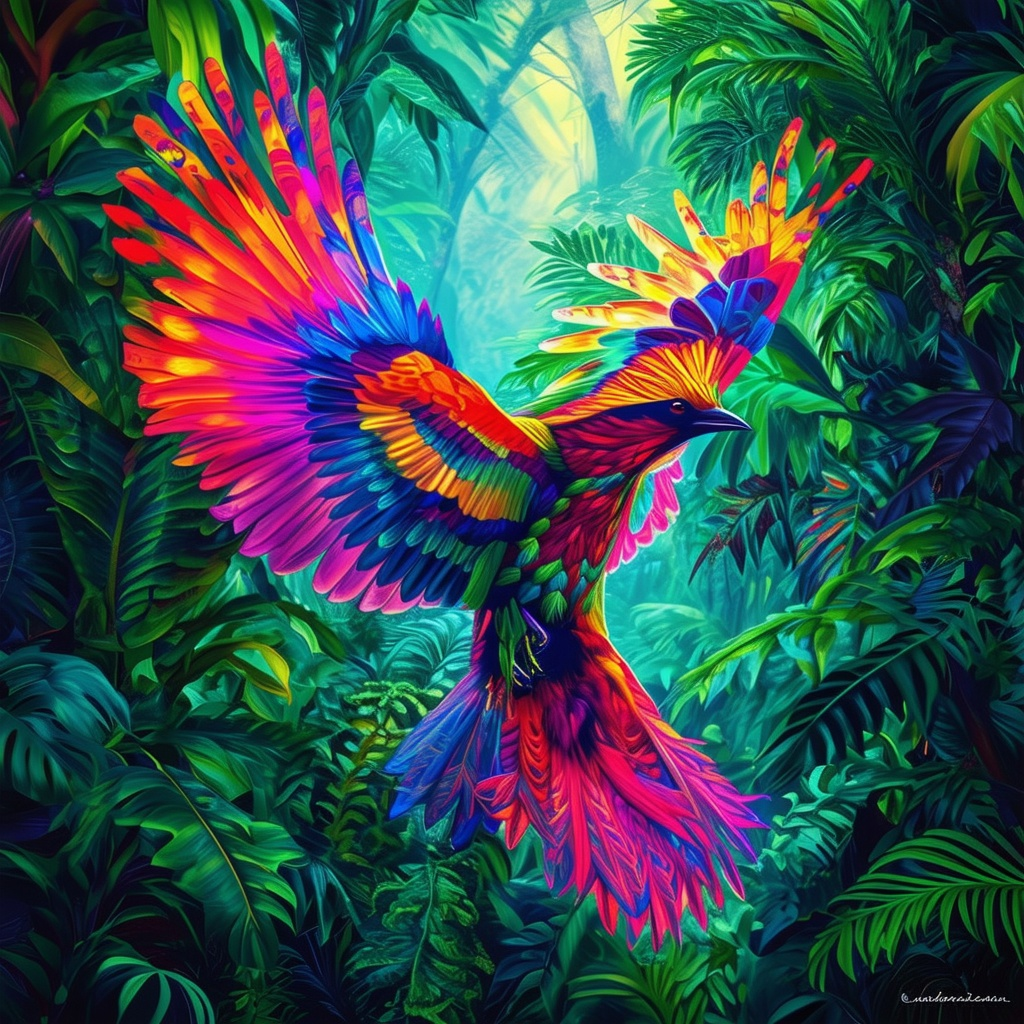

In [4]:
#@title SD3 Large

prompt = "This dreamlike digital art captures a vibrant, kaleidoscopic bird in a lush rainforest" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
aspect_ratio = "1:1" #@param ["21:9", "16:9", "3:2", "5:4", "1:1", "4:5", "2:3", "9:16", "9:21"]
seed = 0 #@param {type:"integer"}
output_format = "jpeg" #@param ["jpeg", "png"]

host = f"https://api.stability.ai/v2beta/stable-image/generate/sd3"

params = {
    "prompt" : prompt,
    "negative_prompt" : negative_prompt,
    "aspect_ratio" : aspect_ratio,
    "seed" : seed,
    "output_format" : output_format,
    "model" : "sd3-large",
    "mode" : "text-to-image"
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
generated = f"generated_{seed}.{output_format}"
with open(generated, "wb") as f:
    f.write(output_image)
print(f"Saved image {generated}")

output.no_vertical_scroll()
print("Result image:")
IPython.display.display(Image.open(generated))


Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/sd3...
Saved image generated_1150105259.jpeg


<IPython.core.display.Javascript object>

Result image:


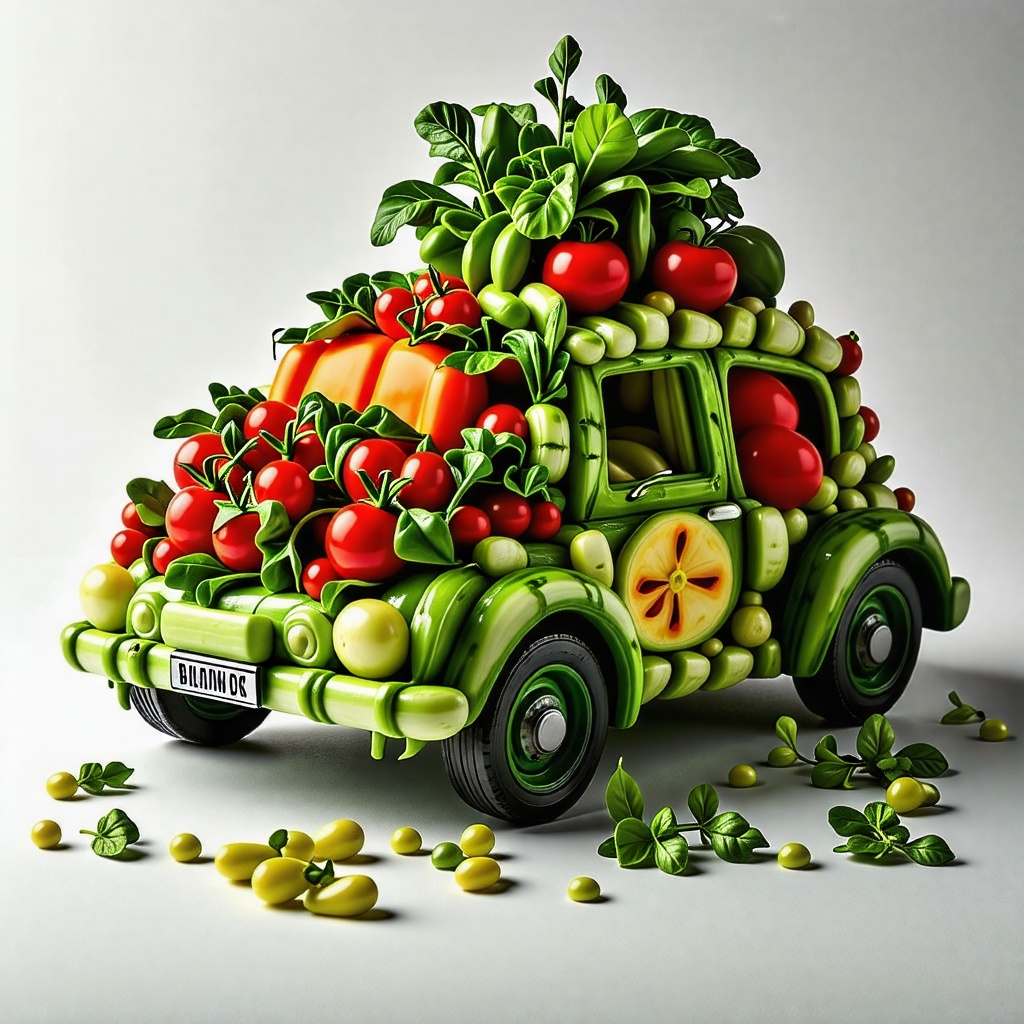

In [5]:
#@title SD3 Large Turbo

prompt = "A car made out of vegetables." #@param {type:"string"}
aspect_ratio = "1:1" #@param ["21:9", "16:9", "3:2", "5:4", "1:1", "4:5", "2:3", "9:16", "9:21"]
seed = 0 #@param {type:"integer"}
output_format = "jpeg" #@param ["jpeg", "png"]

host = f"https://api.stability.ai/v2beta/stable-image/generate/sd3"

params = {
    "prompt" : prompt,
    "aspect_ratio" : aspect_ratio,
    "seed" : seed,
    "output_format" : output_format,
    "model" : "sd3-large-turbo"
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
generated = f"generated_{seed}.{output_format}"
with open(generated, "wb") as f:
    f.write(output_image)
print(f"Saved image {generated}")

output.no_vertical_scroll()
print("Result image:")
IPython.display.display(Image.open(generated))


Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/sd3...
Saved image generated_3390930255.jpeg


<IPython.core.display.Javascript object>

Result image:


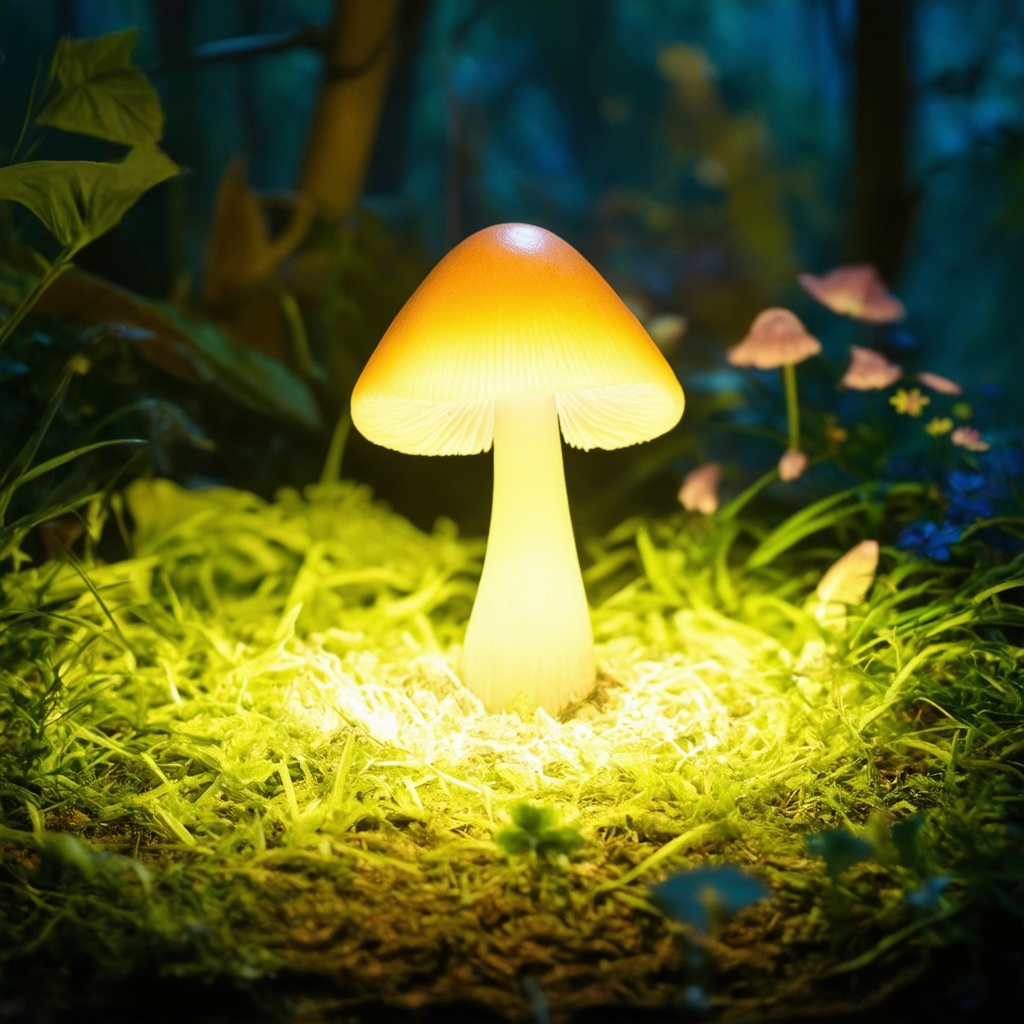

In [6]:
#@title SD3 Medium

prompt = "glowing mushroom in the alchemist's garden" #@param {type:"string"}
aspect_ratio = "1:1" #@param ["21:9", "16:9", "3:2", "5:4", "1:1", "4:5", "2:3", "9:16", "9:21"]
seed = 0 #@param {type:"integer"}
output_format = "jpeg" #@param ["jpeg", "png"]

host = f"https://api.stability.ai/v2beta/stable-image/generate/sd3"

params = {
    "prompt" : prompt,
    "aspect_ratio" : aspect_ratio,
    "seed" : seed,
    "output_format" : output_format,
    "model" : "sd3-medium"
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
generated = f"generated_{seed}.{output_format}"
with open(generated, "wb") as f:
    f.write(output_image)
print(f"Saved image {generated}")

output.no_vertical_scroll()
print("Result image:")
IPython.display.display(Image.open(generated))


# Image to Image

In [7]:
#@title SD3 Large
#@markdown - Drag and drop image to file folder on left
#@markdown - Right click it and choose Copy path
#@markdown - Paste that path into image field below
#@markdown <br><br>

image = "/content/veggiecar.png" #@param {type:"string"}
prompt = "A car made out of  fruits" #@param {type:"string"}
negative_prompt = "" #@param {type:"string"}
seed = 0 #@param {type:"integer"}
output_format = "jpeg" #@param ["jpeg", "png"]
strength = 0.75 #@param {type:"slider", min:0.0, max: 1.0, step: 0.01}

host = f"https://api.stability.ai/v2beta/stable-image/generate/sd3"

params = {
    "image" : image,
    "prompt" : prompt,
    "negative_prompt" : negative_prompt,
    "strength" : strength,
    "seed" : seed,
    "output_format": output_format,
    "model" : "sd3-large",
    "mode" : "image-to-image"
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
generated = f"generated_{seed}.{output_format}"
with open(generated, "wb") as f:
    f.write(output_image)
print(f"Saved image {generated}")

output.no_vertical_scroll()
print("Result image:")
IPython.display.display(Image.open(generated))


Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/sd3...


Exception: HTTP 402: {"errors":["You lack sufficient credits to make this request.  Please purchase more credits at https://platform.stability.ai/account/credits and try again."],"id":"9a816612aee8e537d77c8eb4b20347ce","name":"payment_required"}

Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/sd3...
Saved image generated_3924138557.jpeg


<IPython.core.display.Javascript object>

Result image:


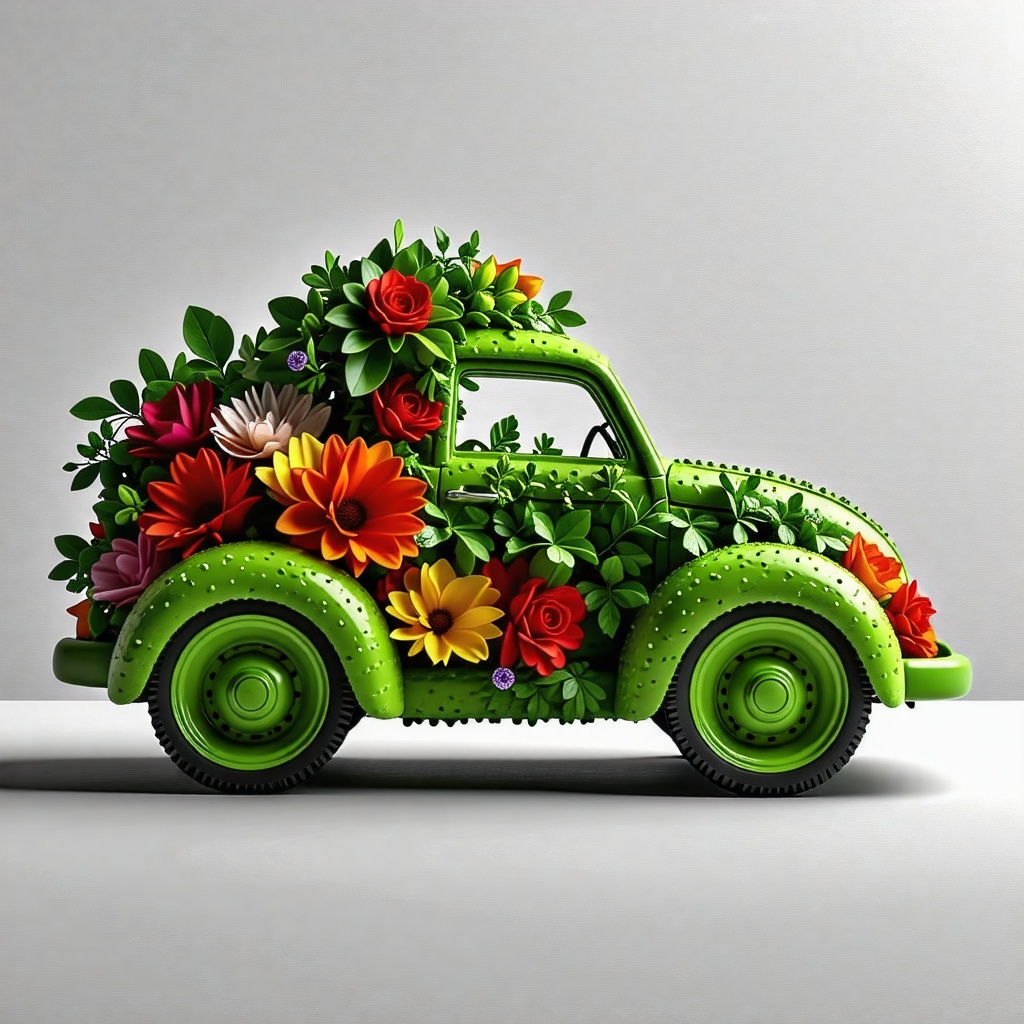

In [ ]:
#@title SD3 Large Turbo
#@markdown - Drag and drop image to file folder on left
#@markdown - Right click it and choose Copy path
#@markdown - Paste that path into image field below
#@markdown <br><br>

image = "/content/veggiecar.png" #@param {type:"string"}
prompt = "A car made out of flowers" #@param {type:"string"}
seed = 0 #@param {type:"integer"}
output_format = "jpeg" #@param ["jpeg", "png"]
strength = 0.75 #@param {type:"slider", min:0.0, max: 1.0, step: 0.01}

host = f"https://api.stability.ai/v2beta/stable-image/generate/sd3"

params = {
        "image" : image,
        "prompt" : prompt,
        "strength" : strength,
        "seed" : seed,
        "output_format": output_format,
        "mode" : "image-to-image",
        "model" : "sd3-large-turbo"
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
generated = f"generated_{seed}.{output_format}"
with open(generated, "wb") as f:
    f.write(output_image)
print(f"Saved image {generated}")

output.no_vertical_scroll()
print("Result image:")
IPython.display.display(Image.open(generated))


Sending REST request to https://api.stability.ai/v2beta/stable-image/generate/sd3...
Saved image generated_1952990718.jpeg


<IPython.core.display.Javascript object>

Result image:


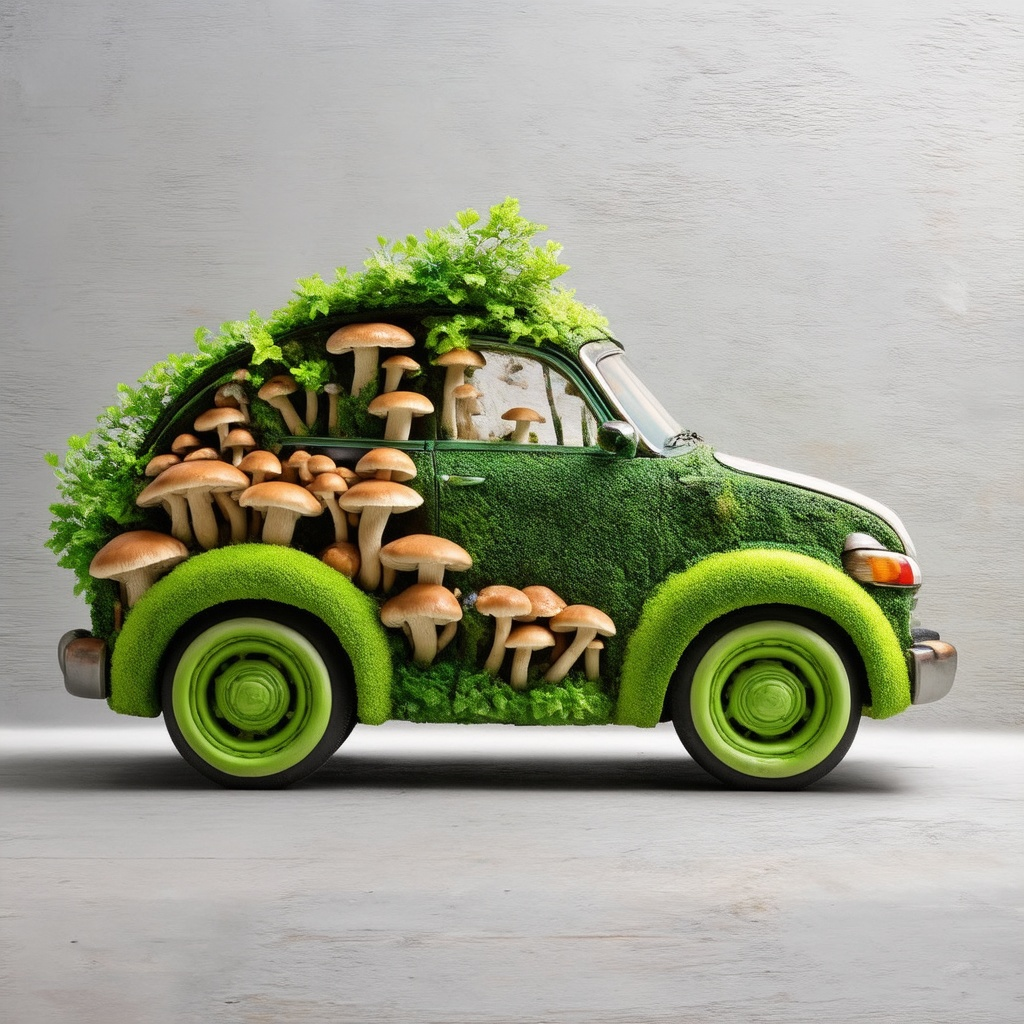

In [ ]:
#@title SD3 Medium
#@markdown - Drag and drop image to file folder on left
#@markdown - Right click it and choose Copy path
#@markdown - Paste that path into image field below
#@markdown <br><br>

image = "/content/veggiecar.png" #@param {type:"string"}
prompt = "A car made out of mushrooms" #@param {type:"string"}
seed = 0 #@param {type:"integer"}
output_format = "jpeg" #@param ["jpeg", "png"]
strength = 0.75 #@param {type:"slider", min:0.0, max: 1.0, step: 0.01}

host = f"https://api.stability.ai/v2beta/stable-image/generate/sd3"

params = {
        "image" : image,
        "prompt" : prompt,
        "strength" : strength,
        "seed" : seed,
        "output_format": output_format,
        "mode" : "image-to-image",
        "model" : "sd3-medium"
}

response = send_generation_request(
    host,
    params
)

# Decode response
output_image = response.content
finish_reason = response.headers.get("finish-reason")
seed = response.headers.get("seed")

# Check for NSFW classification
if finish_reason == 'CONTENT_FILTERED':
    raise Warning("Generation failed NSFW classifier")

# Save and display result
generated = f"generated_{seed}.{output_format}"
with open(generated, "wb") as f:
    f.write(output_image)
print(f"Saved image {generated}")

output.no_vertical_scroll()
print("Result image:")
IPython.display.display(Image.open(generated))
